# Coding Homework - Fall 2023
* This is one of two coding assignments that I will manually grade
* It is broken into a few sections
* Please note that I will be grading these manually so it may take some time to get them all graded and due to the number of students, my feedback may be high level
* Please remember to include some exporation and cleaning of your data
* Include visualization to explain your model
* We have discussed everything you need for this notebook and demo notebooks have code examples
* Don't forgot to save a copy of the notebook before you make changes


# Student Names
* <1 Alfredo Flores>
* <2 Nick Russert>
* If you work in a group, make sure to join a group in Canvas
* *Working in a group is optional*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Titanic (50 points)
* Use the data from https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
* Explore the data
* Create and test a model to predict if someone likely survived or not
* Provide relevant visualizations

In [ ]:
# Your code here
# Read the dataset
dataset = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(dataset)

Exploring the data:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

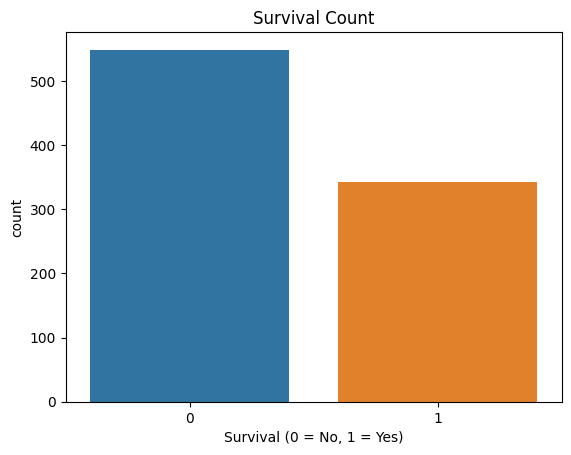

- This graph contains the total survival count for all passengers.



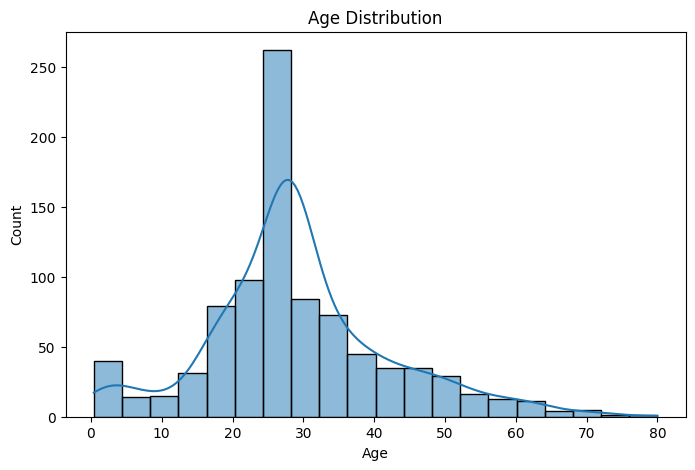

- This graph visualizes the age distribution of all 891 passengers with a mean age of about 30.



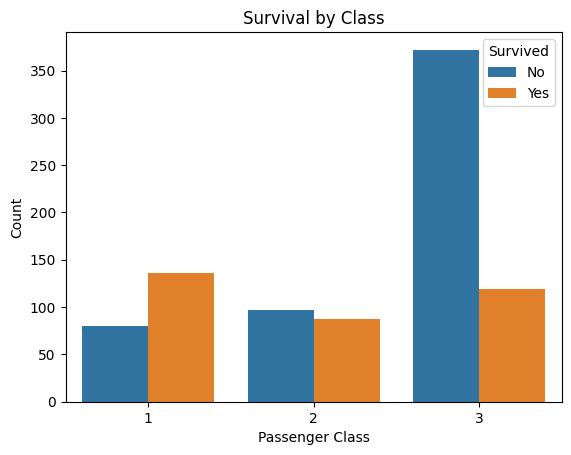

- This graph showcases the survival rate of all passengers based on their class level.



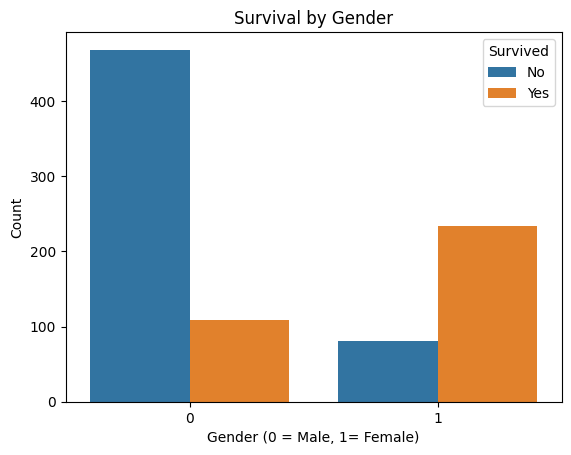

- This graph illuminates the survival rate of all passengers based on gender.


In [ ]:
# ---- Explore the data ----
print("Exploring the data:\n")

# Display the first few rows of data
print(titanic.head())

# Gets info about the data
print("\nGetting information about the data:")
print(titanic.info())

# Statistical summary of the data
print("\nStatistical summary of data:")
print(titanic.describe())

# Drops some columns and fills any missing values in dataset
titanic.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

# Convert non-numeric info to numeric
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first = True)

# Encode Genders using label encoding (0: male and 1: female)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1}).astype(int)

# ---- Creating Prediction Model -----

# Select relevant factors for the model
factors = ['Sex', 'Age', 'Pclass']
X = titanic[factors]
Y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Create and train a Random Forest classifier
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, Y_train)

# Make predictions
Y_prediction = clf.predict(X_test)

print("\nEvaluating Prediction Model:")
print("- Random Forest is a machine learning algorithm that combines the predictions of multiple decision trees to reach one precise prediction.")

# ---- Testing the Prediction Model ----
print("Test Cases:")
test_passenger = pd.DataFrame({
    'Sex' : ['female'],
    'Age' : [38],
    'Pclass' : [1]
})

# Convert gender to numeric value
test_passenger['Sex'] = test_passenger['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Predict survival rate for test passenger No.1
test_passenger_prediction = clf.predict(test_passenger)

if test_passenger_prediction == 0:
  print("Test passenger No.1 likely did not survive.")
else:
  print("Test passenger No.1 likely did survive.")

# test No.2
test_passenger = pd.DataFrame({
    'Sex' : ['male'],
    'Age' : [22],
    'Pclass' : [3]
})
test_passenger['Sex'] = test_passenger['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Predict survival rate for test passenger No.2
test_passenger_prediction = clf.predict(test_passenger)

if test_passenger_prediction == 0:
  print("Test passenger No.2 likely did not survive.")
else:
  print("Test passenger No.2 likely did survive.")

# Evaluate model
modelAccuracy = accuracy_score(Y_test, Y_prediction)
print(f'Accuracy: {modelAccuracy}')

print("\n")

# -- Visualization --
print("Visualization:")

# Survived vs. Did Not Survive Count
sns.countplot(x='Survived', data = titanic)
plot.title('Survival Count')
plot.xlabel('Survival (0 = No, 1 = Yes)')
plot.show()

print("- This graph contains the total survival count for all passengers.\n")

# Age Distribution of Passengers
plot.figure(figsize=(8, 5))
sns.histplot(titanic['Age'], bins = 20, kde = True)
plot.title('Age Distribution')
plot.xlabel('Age')
plot.show()

print("- This graph visualizes the age distribution of all 891 passengers with a mean age of about 30.\n")

# Passenger Class vs. Survival
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)
plot.title('Survival by Class')
plot.xlabel('Passenger Class')
plot.ylabel('Count')
plot.legend(title = 'Survived', labels = ['No', 'Yes'])
plot.show()

print("- This graph showcases the survival rate of all passengers based on their class level.\n")

# Gender vs. Survival
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic)
plot.title('Survival by Gender')
plot.xlabel('Gender (0 = Male, 1= Female)')
plot.ylabel('Count')
plot.legend(title = 'Survived', labels = ['No', 'Yes'])
plot.show()

print("- This graph illustrates the survival rate of all passengers based on gender.")

## California Housing (50 points)
* Load the California housing data using
    *   from sklearn.datasets import fetch_california_housing
* Explore the data
* Create a model to predict medium housing values
* Include information on how you evaluated your model
* Include relevant visualizatons

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
# Ref: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(housing.data.sample(5))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10238  6.5945      21.0  8.132992   1.109974      1413.0  3.613811     33.90   
7949   5.0840      44.0  5.678445   0.957597       799.0  2.823322     33.87   
5877   3.2015      42.0  4.949782   1.043668      1083.0  2.364629     34.16   
6807   4.2833      44.0  5.079914   1.045356      1517.0  3.276458     34.09   
1189   2.3566      15.0  5.665775   1.040107      1079.0  2.885027     39.43   

       Longitude  
10238    -117.88  
7949     -118.14  
5877     -118.35  
6807     -118.10  
1189     -121.52  


In [ ]:
print(housing.target.sample(10))

12858    0.734
2680     0.637
6119     1.326
6945     1.779
15936    2.503
9608     0.798
1244     0.720
246      1.113
9360     2.713
9517     0.962
Name: MedHouseVal, dtype: float64


In [ ]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Exploring the data:

Getting information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

Statistical summary of data:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000 

<function matplotlib.pyplot.show(close=None, block=None)>

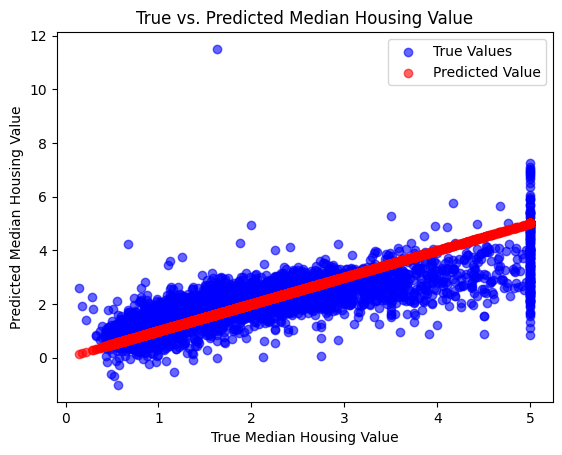

In [ ]:
# --- Exploring the data ---
print("Exploring the data:")
housingAsDF = pd.DataFrame(housing.data, columns = housing.feature_names)

# Gets info about the data
print("\nGetting information about the data:")
print(housingAsDF.info())

# Statistical summary of the data
print("\nStatistical summary of data:")
print(housingAsDF.describe())

# --- Model to predict median housing values ---

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)

# Create & train linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make prediction
Y_prediction = model.predict(X_test)

# Evaluating prediction model
print("\nEvaluating prediction model:")
print("- The linear regression model is a simple but powerful tool for modeling and understanding the relationship between variables.")
print("It provides a method of making predictions based on data, especially when there's a linear or approximately linear relationship between the variables.")

# Calculate Mean Squared Error. This tells us how close to the regression line the data is
mse = mean_squared_error(Y_test, Y_prediction)
print(f"\nMean Squared Error(MSE): {mse}")
print("- MSE tells us how well the model's predictions align with the actual data, with lower values indicating better predictive performance.\n")

# Calculate R-squared. A statistical measure of how well the regression line approximates the actual data.
r2 = r2_score(Y_test, Y_prediction)
print(f"R-squared(R2): {r2}")
print("- An R2 value between 0 and 0.5 is often considered reasonable for many applications. It indicates that the model is explaining some of")
print("the variance in the target variable but may not capture all of it.")
print("\n")

# Graph predictions made by model
print("Visualization:")
plot.scatter(Y_test, Y_prediction, c = 'blue', label = 'True Values', alpha = .6)
plot.scatter(Y_test, Y_test, c = 'red', label = 'Predicted Value', alpha = .6)

plot.xlabel("True Median Housing Value")
plot.ylabel("Predicted Median Housing Value")
plot.title("True vs. Predicted Median Housing Value")
plot.legend()
plot.show

# Wine Quality (50 points)
* Use an unsupervised method to group wines together
* Explore your data
* Even though this is a labeled training set, do not look at the target variable
* Use a technique to determine how many groups there are in your data
* Analyze your results and discuss metrics you used to analyze your results
* Overlay the actual results onto the groups and create a comparison
* Use visualization to help explain your model

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine = datasets.load_wine()
data = wine.data
target = wine.target
feature_names = wine.feature_names

In [ ]:
dfWine = pd.DataFrame(data, columns=feature_names)

Exploring the data:

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

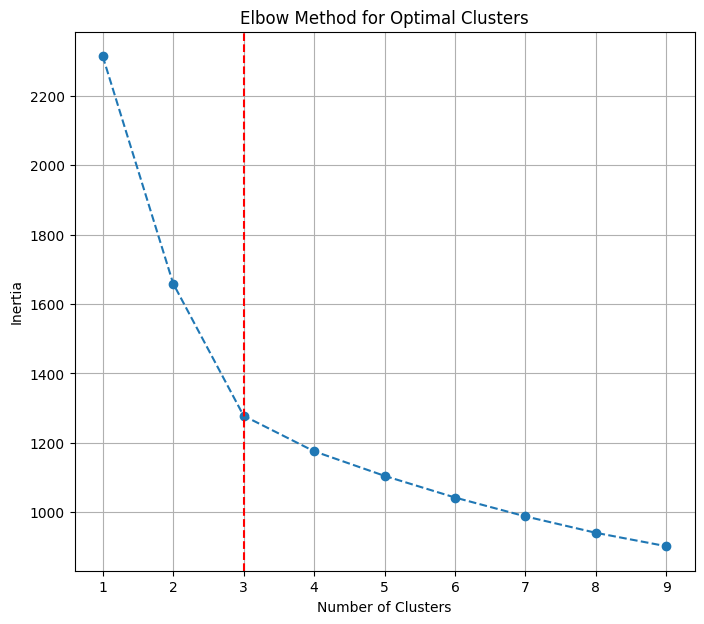

- This graph illustrates the data from the Elbow Method used to find the optimal number of clusters corresponding to the given data.
- The red dashed line highlights the optimal number of clusters (3).



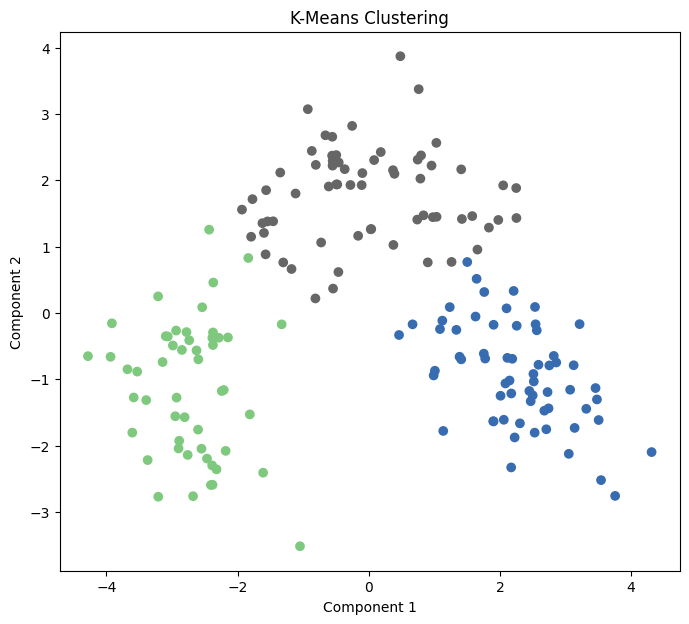

- This graph visualizes the appropriate clusters based on the given data using K-Means Clustering.
- K-Means Clustering is an unsupervised machine learning algorithm used for grouping data points into clusters based
on their similarities, with the goal of minimizing the variance within clusters and maximizing the variance between clusters.



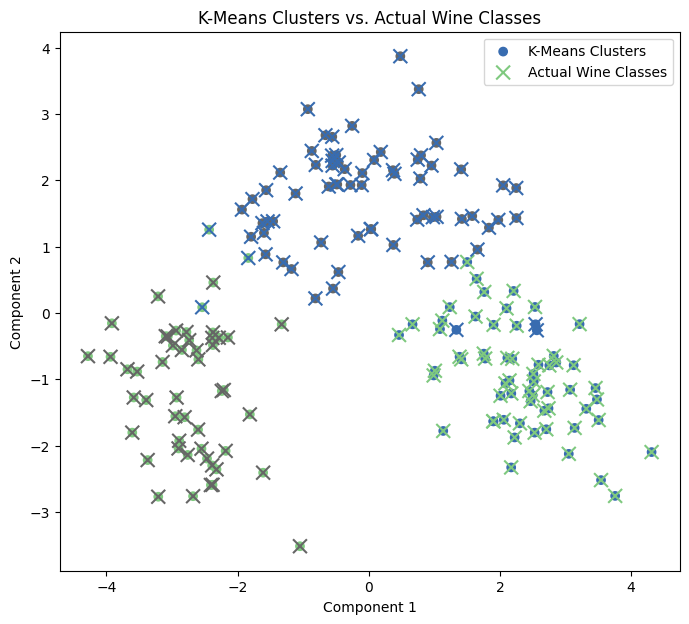

- This graph showcases the predicted data clusters vs. the true clusters of the given data.
- Component 1 and Component 2 create scatter plots that represent data points in a 2D space. The positions of data points along these components are
determined by the PCA transformation, allowing us to visualize the data clusters based on these two variables, which are derived from the original features.


In [ ]:
# --- Exploring the data ---
print("Exploring the data:\n")

print(dfWine.head())

# Gets info about the data
print("\nGetting information about the data:")
print(dfWine.info())

# Statistical summary of the data
print("\nStatistical summary of data:")
print(dfWine.describe())

# Standardize the data
standardize = StandardScaler()
dataScaled = standardize.fit_transform(data)

# Determine optimal number of data clusters using the Elbow Method
inert = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  kmeans.fit(dataScaled)
  inert.append(kmeans.inertia_)

print("\nVisualization:")
# Plot graph to find optimal number of data clusters
plot.figure(figsize=(8, 7))
plot.plot(range(1, 10), inert, marker = 'o', linestyle = '--')
plot.xlabel('Number of Clusters')
plot.ylabel('Inertia')
plot.title('Elbow Method for Optimal Clusters')
plot.grid()

# Highlight optimal # of clusters
plot.axvline(x = 3, color = 'red', linestyle = '--')

plot.show()

print("- This graph illustrates the data from the Elbow Method used to find the optimal number of clusters corresponding to the given data.")
print("- The red dashed line highlights the optimal number of clusters (3).\n")

# Based on the graph, the optimal number of clusters is 3

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
dfWine['cluster'] = kmeans.fit_predict(dataScaled)

# Reduce dimensionality for visualization
pca = PCA(n_components = 2)
pcaData = pca.fit_transform(dataScaled)

# Create scatter plot to visualize data clusters
plot.figure(figsize = (8, 7))
plot.scatter(pcaData[:, 0], pcaData[:, 1], c = dfWine['cluster'], cmap = 'Accent')
plot.title('K-Means Clustering')
plot.xlabel('Component 1')
plot.ylabel('Component 2')
plot.show()

print("- This graph visualizes the appropriate clusters based on the given data using K-Means Clustering.")
print("- K-Means Clustering is an unsupervised machine learning algorithm used for grouping data points into clusters based")
print("on their similarities, with the goal of minimizing the variance within clusters and maximizing the variance between clusters.\n")

# Create scatter plot to compare K-Means clusters with actual wine classes
plot.figure(figsize=(8, 7))

# Plot K-Means clusters
plot.scatter(pcaData[:, 0], pcaData[:, 1], c = dfWine['cluster'], cmap = 'Accent', label = 'K-Means Clusters')

# Plot actual wine classes
plot.scatter(pcaData[:, 0], pcaData[:, 1], c = target, cmap = 'Accent', marker = 'x', s = 100, label = 'Actual Wine Classes')

plot.title('K-Means Clusters vs. Actual Wine Classes')
plot.xlabel('Component 1')
plot.ylabel('Component 2')
plot.legend()
plot.show()

print("- This graph showcases the predicted data clusters vs. the true clusters of the given data.")
print("- Component 1 and Component 2 create scatter plots that represent data points in a 2D space. The positions of data points along these components are")
print("determined by the PCA transformation, allowing us to visualize the data clusters based on these two variables, which are derived from the original features.")